In [1]:
# Dependencies
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as st 


In [2]:
#import csv (includes MovieData.csv and API data)
api_df = pd.read_csv("Resources/api_merge_df.csv")
api_df

,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,26%,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%
1,Krrish,India,23 Jun 2006,6.4,68.0,88%,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,41%,10000000,11748661,175380,PG-13,Drama,11924041,119.24%
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,81%,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,28%,10000000,80238724,83638091,R,Horror,163876815,1638.77%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,Widows,"UK, USA",16 Nov 2018,8.0,49.0,79%,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%
1822,Instant Family,USA,16 Nov 2018,7.2,61.0,65%,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%
1823,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,88%,50000000,103678298,47511103,R,Drama,151189401,302.38%
1824,Creed II,USA,21 Nov 2018,7.3,60.0,97%,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%


In [3]:
#combine domestic box office and international box office to create new column revenue
api_df["total revenue"] = (api_df['domestic_box_office'] + api_df['international_box_office']).astype(int)
 

In [4]:
#format budget and revenue to display in millions of dollars
api_df['budget(in millions $)'] = '$' + (round((api_df['production_budget'].astype(float)/1000000), 2)).astype(str) + 'MM'
api_df["revenue(in millions $)"] = '$' + (round((api_df['total revenue'].astype(float)/1000000), 2)).astype(str) + 'MM'
api_df

,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI,total revenue,budget(in millions $),revenue(in millions $)
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,26%,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%,63320521,$10.0MM,$63.32MM
1,Krrish,India,23 Jun 2006,6.4,68.0,88%,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%,32430721,$10.0MM,$32.43MM
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,41%,10000000,11748661,175380,PG-13,Drama,11924041,119.24%,11924041,$10.0MM,$11.92MM
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,81%,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%,26716191,$10.0MM,$26.72MM
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,28%,10000000,80238724,83638091,R,Horror,163876815,1638.77%,163876815,$10.0MM,$163.88MM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,Widows,"UK, USA",16 Nov 2018,8.0,49.0,79%,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%,73866088,$40.0MM,$73.87MM
1822,Instant Family,USA,16 Nov 2018,7.2,61.0,65%,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%,114491088,$48.0MM,$114.49MM
1823,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,88%,50000000,103678298,47511103,R,Drama,151189401,302.38%,151189401,$50.0MM,$151.19MM
1824,Creed II,USA,21 Nov 2018,7.3,60.0,97%,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%,212654387,$50.0MM,$212.65MM


In [5]:
api_df

,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI,total revenue,budget(in millions $),revenue(in millions $)
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,26%,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%,63320521,$10.0MM,$63.32MM
1,Krrish,India,23 Jun 2006,6.4,68.0,88%,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%,32430721,$10.0MM,$32.43MM
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,41%,10000000,11748661,175380,PG-13,Drama,11924041,119.24%,11924041,$10.0MM,$11.92MM
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,81%,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%,26716191,$10.0MM,$26.72MM
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,28%,10000000,80238724,83638091,R,Horror,163876815,1638.77%,163876815,$10.0MM,$163.88MM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,Widows,"UK, USA",16 Nov 2018,8.0,49.0,79%,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%,73866088,$40.0MM,$73.87MM
1822,Instant Family,USA,16 Nov 2018,7.2,61.0,65%,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%,114491088,$48.0MM,$114.49MM
1823,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,88%,50000000,103678298,47511103,R,Drama,151189401,302.38%,151189401,$50.0MM,$151.19MM
1824,Creed II,USA,21 Nov 2018,7.3,60.0,97%,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%,212654387,$50.0MM,$212.65MM


The correlation coefficient is 0.78
The linear regression line equation is y = 3.47x + -25520764.15


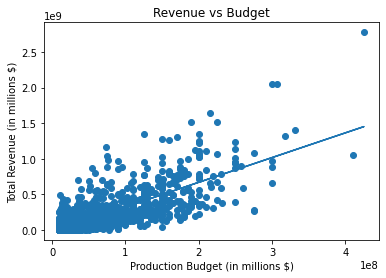

In [6]:
#create linear regression object showing revenue vs budget
x_values = api_df['production_budget'] 
y_values = api_df['total revenue']

plt.scatter(x_values,y_values)


plt.xlabel("Production Budget (in millions $)")
plt.ylabel("Total Revenue (in millions $)")
plt.title("Revenue vs Budget")

correlationG = st.pearsonr(x_values,y_values)
m, b = np.polyfit(x_values,y_values, 1)
plt.plot(x_values, m*x_values + b)
line_eq_G = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationG[0],2)))
print("The linear regression line equation is " + line_eq_G)
plt.show()

plt.show()


In [7]:
list(api_df["genre"].unique())

['Comedy',
 'Action',
 'Drama',
 'Horror',
 'Black Comedy',
 'Thriller/Suspense',
 'Musical',
 'Adventure',
 'Romantic Comedy',
 'Western',
 nan,
 'Concert/Performance',
 'Documentary']

In [8]:
genres_that_will_be_plotted = list(api_df["genre"].unique())

# Create empty list to fill with tumor vol data (for plotting)
revenue_by_genre=[]

for genre in genres_that_will_be_plotted:
    revenue_by_genre.append(list(api_df.loc[api_df["genre"] == genre, 'total revenue']))
    
len(revenue_by_genre)
    

    


13

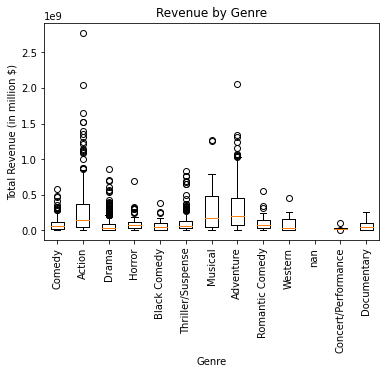

In [9]:
#create box plot showing revenue by genre
plt.boxplot(revenue_by_genre,labels = genres_that_will_be_plotted)

x_values = api_df['revenue(in millions $)'] 
y_values = api_df['genre']

plt.ylabel("Total Revenue (in million $)")
plt.xlabel("Genre")
plt.xticks(rotation=90)
plt.title("Revenue by Genre")

plt.show()

